# Stock Market Analysis 📊📈

## Import modules 📔📚

In [1]:
!python -m pip install -r requirements.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


## 📂 Create Dataset

In [2]:
# to make dataset
# run the file data_generate.py
!python data_generate.py

Data generation completed. Dataset saved to Q1_stock_market.csv.
Execution finished.


## 📌 Main Tasks

### 🔹 Data Preparation

In [3]:
df = pd.read_csv("Q1_stock_market.csv")
df["Date"] = pd.to_datetime(df["Date"])

df.head()

,Record_ID,Symbol,Company_Name,Sector,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume,Market_Cap,PE_Ratio,Dividend_Yield,RSI
0,STK_000242,SBUX,Starbucks Corporation,Consumer Cyclical,2025-03-21,94.83,96.63,92.01,96.01,7.069888e+09,1.111695e+11,22.7,1.42,70.0
1,STK_002993,BA,Boeing Co.,Industrials,2025-02-24,221.13,234.95,215.52,228.81,1.850130e+09,1.456064e+11,18.5,2.17,22.3
2,STK_001802,AMGN,Amgen Inc.,Healthcare,2025-03-11,281.78,286.74,272.55,274.34,1.773730e+09,1.469679e+11,25.9,1.50,54.9
3,STK_002320,GOOGL,Alphabet Inc.,Technology,2025-01-08,138.31,150.51,136.47,147.81,1.217426e+09,1.900414e+12,31.6,4.39,64.6
4,STK_002508,ATVI,Activision Blizzard Inc.,Communication Services,2025-03-01,89.09,93.36,87.28,91.01,1.718413e+09,7.078556e+10,29.9,2.91,46.7


### 🔹 Data Cleaning

In [4]:
df.isna().sum()

Record_ID           0
Symbol              0
Company_Name        0
Sector              0
Date                0
Open_Price        293
High_Price        294
Low_Price         282
Close_Price       304
Volume            272
Market_Cap        271
PE_Ratio          279
Dividend_Yield    293
RSI               304
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

Record_ID         0
Symbol            0
Company_Name      0
Sector            0
Date              0
Open_Price        0
High_Price        0
Low_Price         0
Close_Price       0
Volume            0
Market_Cap        0
PE_Ratio          0
Dividend_Yield    0
RSI               0
dtype: int64

In [6]:
if df.duplicated().sum() > 0:
    print(f"{df.duplicated().sum()} Duplicate rows found and will be removed.")
    df = df.drop_duplicates()
    print(f"Now there are {df.duplicated().sum()} duplicate rows after removal.")
else:
    print("No duplicate rows found.")

141 Duplicate rows found and will be removed.
Now there are 0 duplicate rows after removal.


### 🔹 Data Analysis

In [7]:
# ===============================
# 1. Basic Info
# ===============================
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())

numeric_cols = [
    "Open_Price", "High_Price", "Low_Price", "Close_Price",
    "Volume", "Market_Cap", "PE_Ratio", "Dividend_Yield", "RSI"
]

print("\nSummary Statistics:\n", df[numeric_cols].describe(include="all"))

missing_percent = (df.isna().sum() / len(df)) * 100
print("\nMissing Values (%):\n", missing_percent)


# ===============================
# 2. Stock Price Analysis
# ===============================
avg_close = df["Close_Price"].mean()
print("\nOverall Average Close Price:", avg_close)

close_by_sector = df.groupby("Sector")["Close_Price"].mean().sort_values(ascending=False)
print("\nAverage Close Price by Sector:\n", close_by_sector.head(10))

close_by_symbol = df.groupby("Symbol")["Close_Price"].mean().sort_values(ascending=False)
print("\nAverage Close Price by Symbol:\n", close_by_symbol.head(10))

df["Month"] = pd.to_datetime(df["Date"]).dt.month
close_by_month = df.groupby("Month")["Close_Price"].mean()
print("\nAverage Close Price by Month:\n", close_by_month)


# ===============================
# 3. Market Metrics Analysis
# ===============================
market_means = df[["Volume", "Market_Cap", "PE_Ratio", "Dividend_Yield", "RSI"]].mean().sort_values(ascending=False)
print("\nMean Market Metrics:\n", market_means)

market_max = df[["Volume", "Market_Cap", "PE_Ratio", "Dividend_Yield", "RSI"]].max().sort_values(ascending=False)
print("\nMaximum Recorded Market Metrics:\n", market_max)

# Correlation of metrics with Close Price (by sector averages)
sector_means = df.groupby("Sector")[numeric_cols].mean()
close_means = sector_means["Close_Price"]
metrics_only = sector_means.drop(columns="Close_Price")
metrics_vs_close = metrics_only.corrwith(close_means)

print("\nCorrelation of Metrics with Close Price (by Sector averages):\n", metrics_vs_close)


# ===============================
# 4. Ranges & Relationships
# ===============================
avg_vol_close = df.groupby(pd.qcut(df["Volume"], q=5))["Close_Price"].mean()
print("\nAverage Close Price by Volume Quintile:\n", avg_vol_close)

avg_pe_close = df.groupby(pd.qcut(df["PE_Ratio"], q=5))["Close_Price"].mean()
print("\nAverage Close Price by PE Ratio Quintile:\n", avg_pe_close)

avg_rsi_close = df.groupby(pd.cut(df["RSI"], bins=[0, 30, 70, 100]))["Close_Price"].mean()
print("\nAverage Close Price by RSI Range:\n", avg_rsi_close)


# ===============================
# 5. Correlations
# ===============================
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:\n", corr_matrix)


# ===============================
# 6. Derived Metrics
# ===============================
# Example: Daily Price Range
df["Daily_Range"] = df["High_Price"] - df["Low_Price"]
print("\nAverage Daily Price Range:", df["Daily_Range"].mean())

# Example: Volatility Ratio (Range / Close)
df["Volatility_Ratio"] = df["Daily_Range"] / df["Close_Price"].replace(0, np.nan)
print("\nTop 5 Records with Highest Volatility:\n",
      df.nlargest(5, "Volatility_Ratio")[["Symbol", "Sector", "Date", "Volatility_Ratio"]])

# Example: Overbought/Oversold Flag using RSI
df["Overbought"] = (df["RSI"] > 70).astype(int)
df["Oversold"] = (df["RSI"] < 30).astype(int)
overbought_rate = df["Overbought"].mean()
oversold_rate = df["Oversold"].mean()
print("\nProportion of Overbought Days:", overbought_rate)
print("Proportion of Oversold Days:", oversold_rate)

# Example: Dividend Presence Flag
df["Has_Dividend"] = (df["Dividend_Yield"] > 0).astype(int)
dividend_rate = df.groupby("Sector")["Has_Dividend"].mean().sort_values(ascending=False)
print("\nSectors with Highest Proportion of Dividend Stocks:\n", dividend_rate.head(10))


Dataset Shape: (14959, 14)

Column Data Types:
 Record_ID                 object
Symbol                    object
Company_Name              object
Sector                    object
Date              datetime64[ns]
Open_Price               float64
High_Price               float64
Low_Price                float64
Close_Price              float64
Volume                   float64
Market_Cap               float64
PE_Ratio                 float64
Dividend_Yield           float64
RSI                      float64
dtype: object

Missing Values:
 Record_ID         0
Symbol            0
Company_Name      0
Sector            0
Date              0
Open_Price        0
High_Price        0
Low_Price         0
Close_Price       0
Volume            0
Market_Cap        0
PE_Ratio          0
Dividend_Yield    0
RSI               0
dtype: int64

Summary Statistics:
          Open_Price    High_Price     Low_Price   Close_Price        Volume  \
count  14959.000000  14959.000000  14959.000000  14959.000000  1

C:\Users\Dell\AppData\Local\Temp\ipykernel_15700\4209430811.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_vol_close = df.groupby(pd.qcut(df["Volume"], q=5))["Close_Price"].mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_15700\4209430811.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pe_close = df.groupby(pd.qcut(df["PE_Ratio"], q=5))["Close_Price"].mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_15700\4209430811.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

### 🔹 Data Visualization

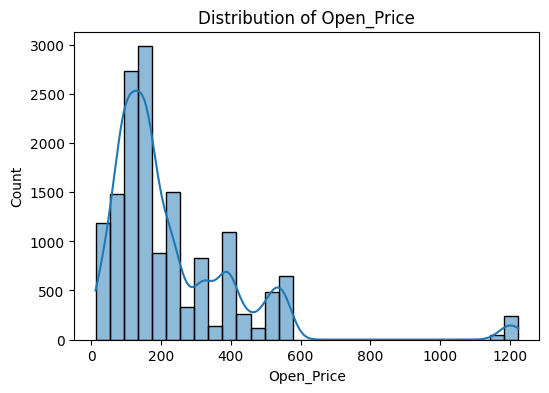

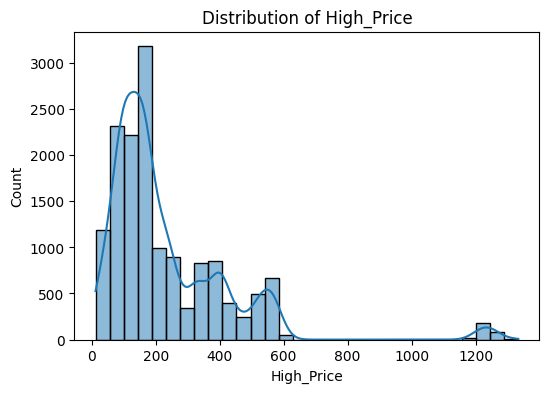

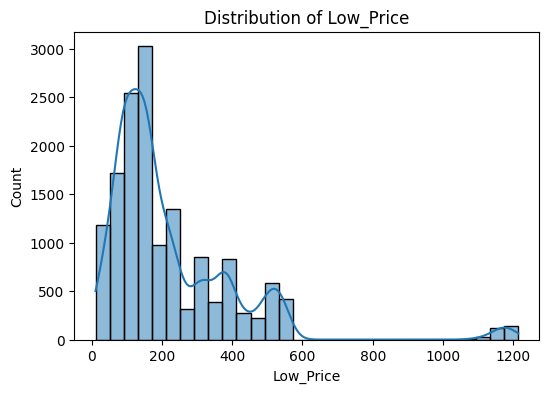

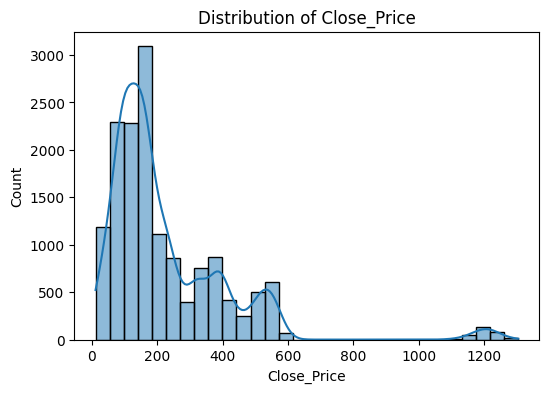

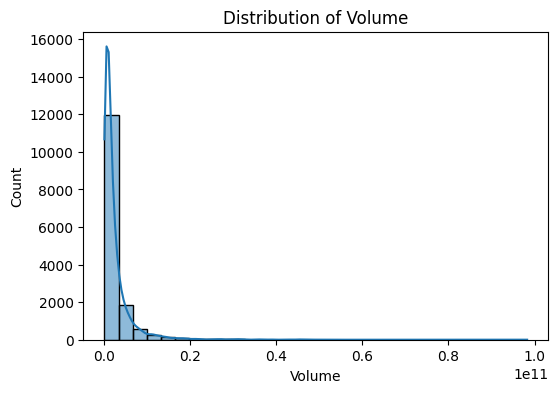

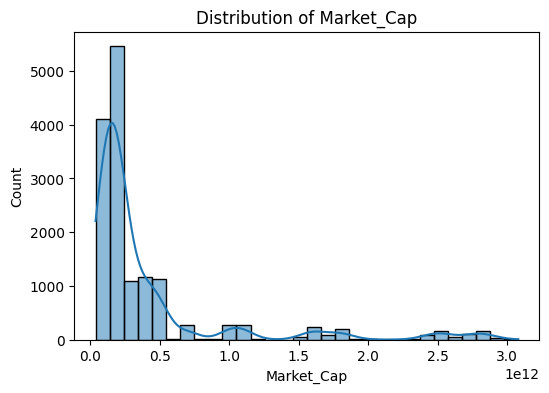

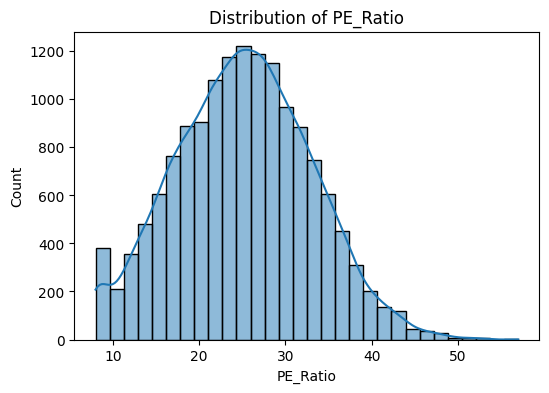

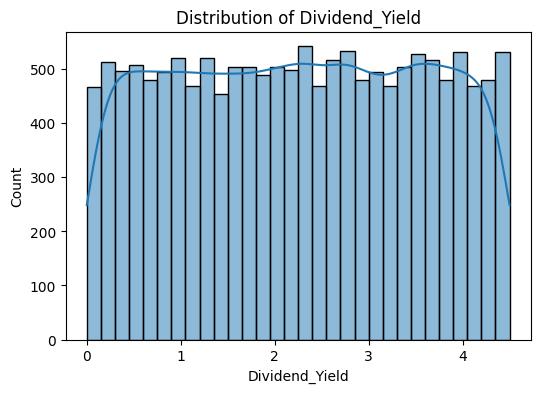

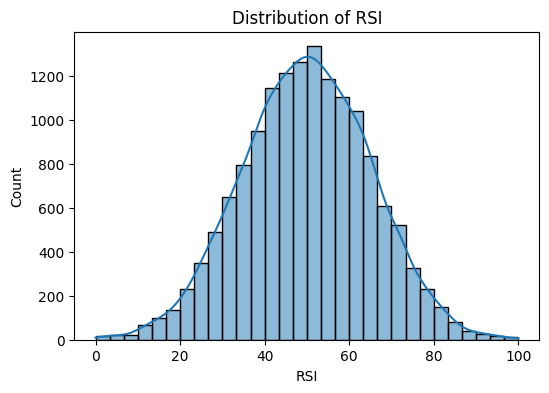

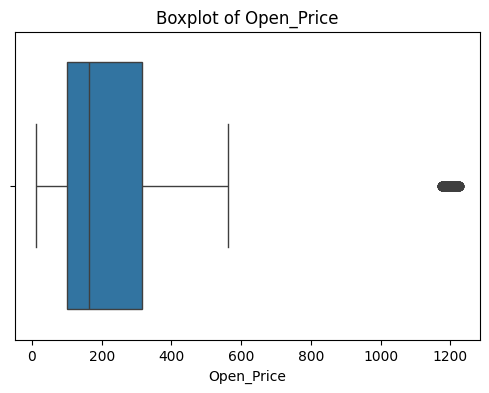

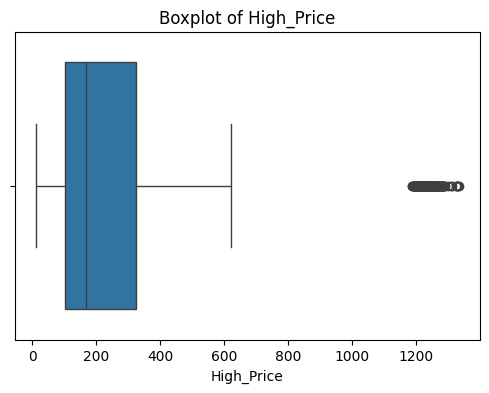

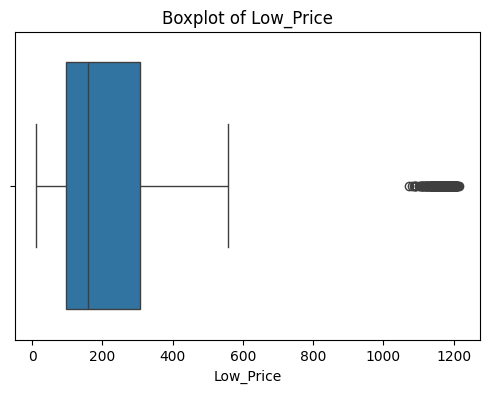

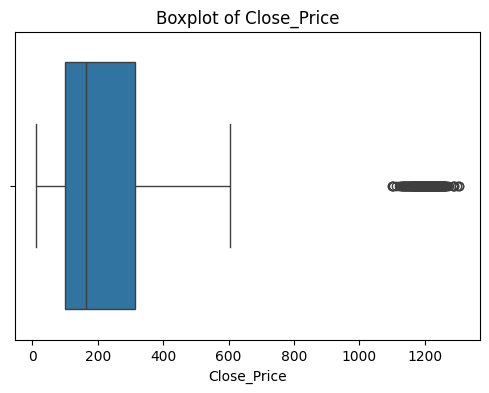

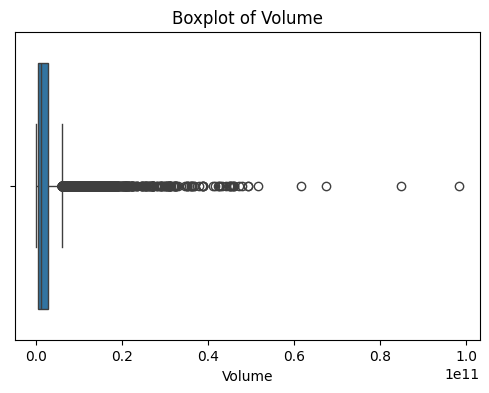

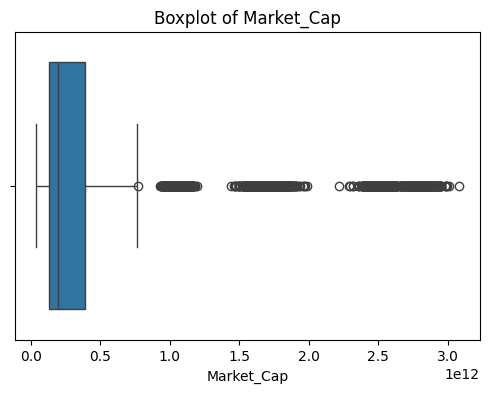

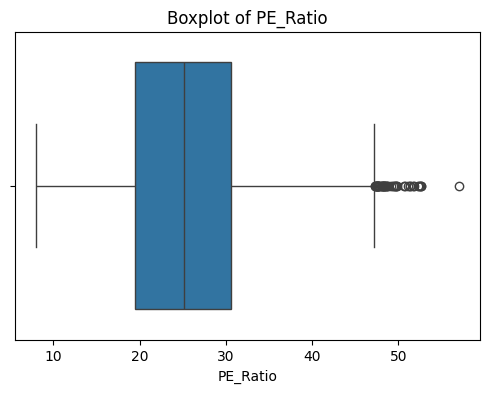

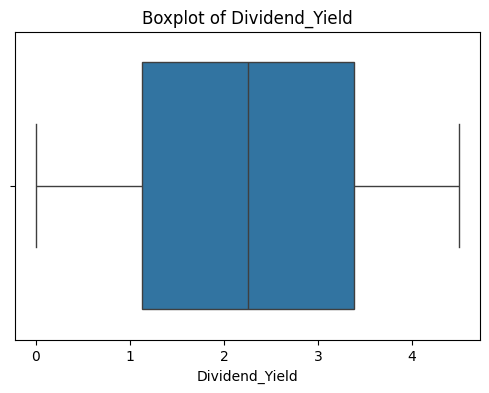

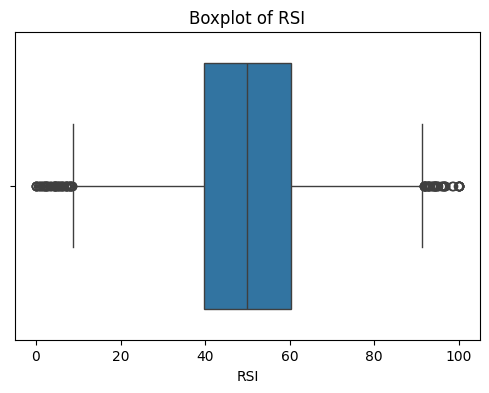

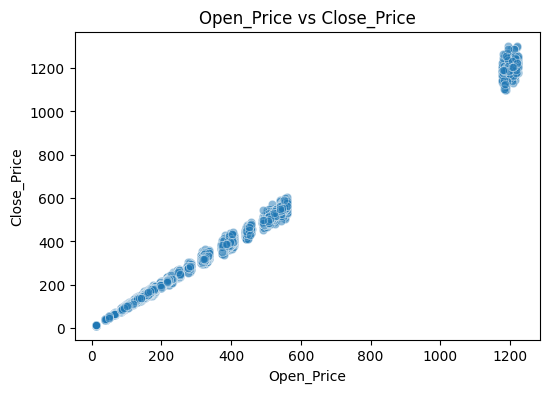

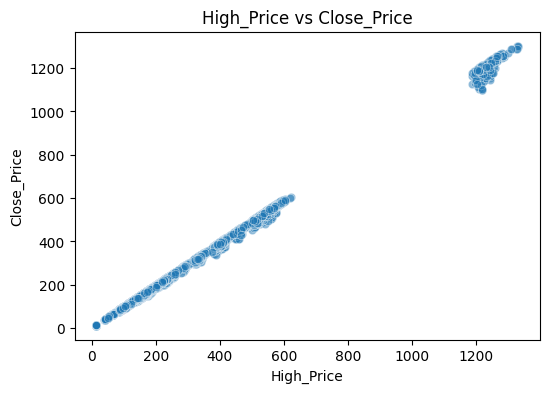

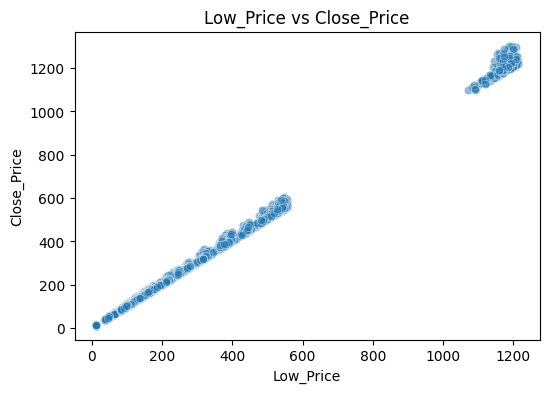

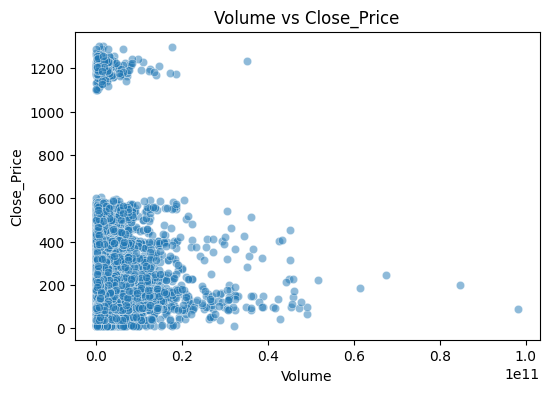

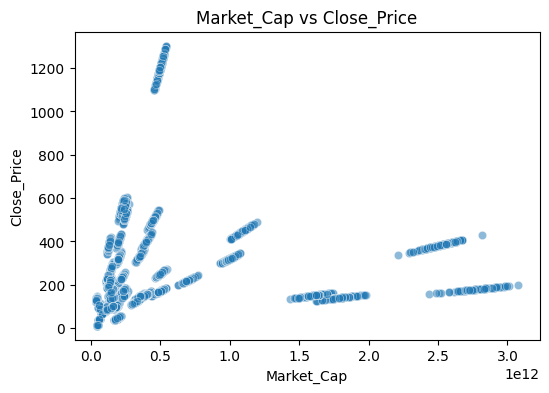

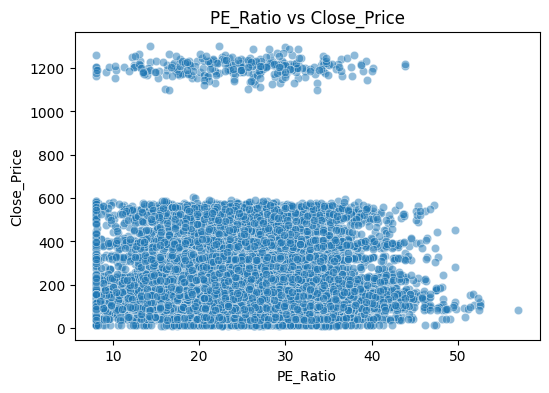

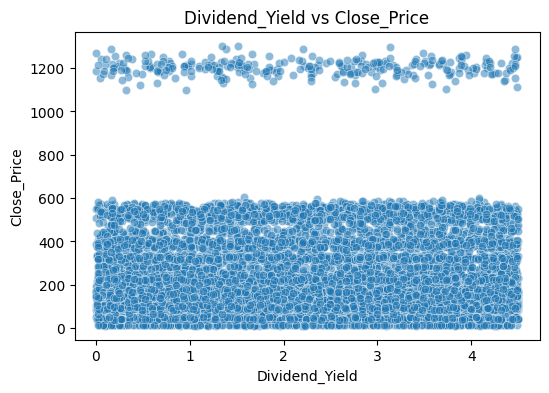

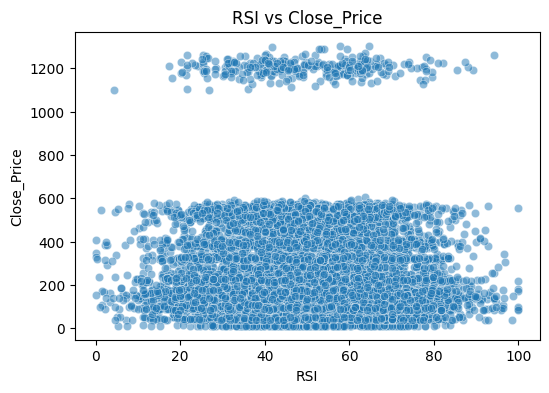

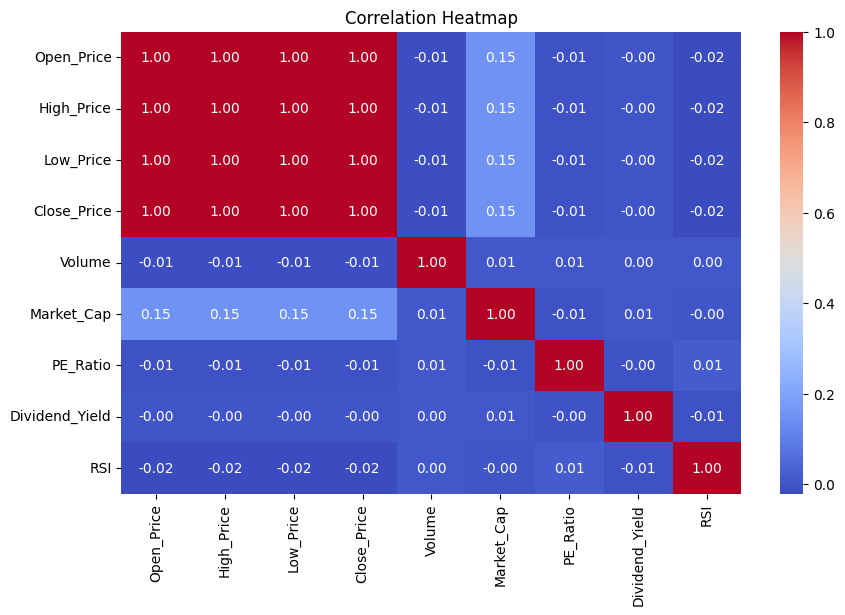

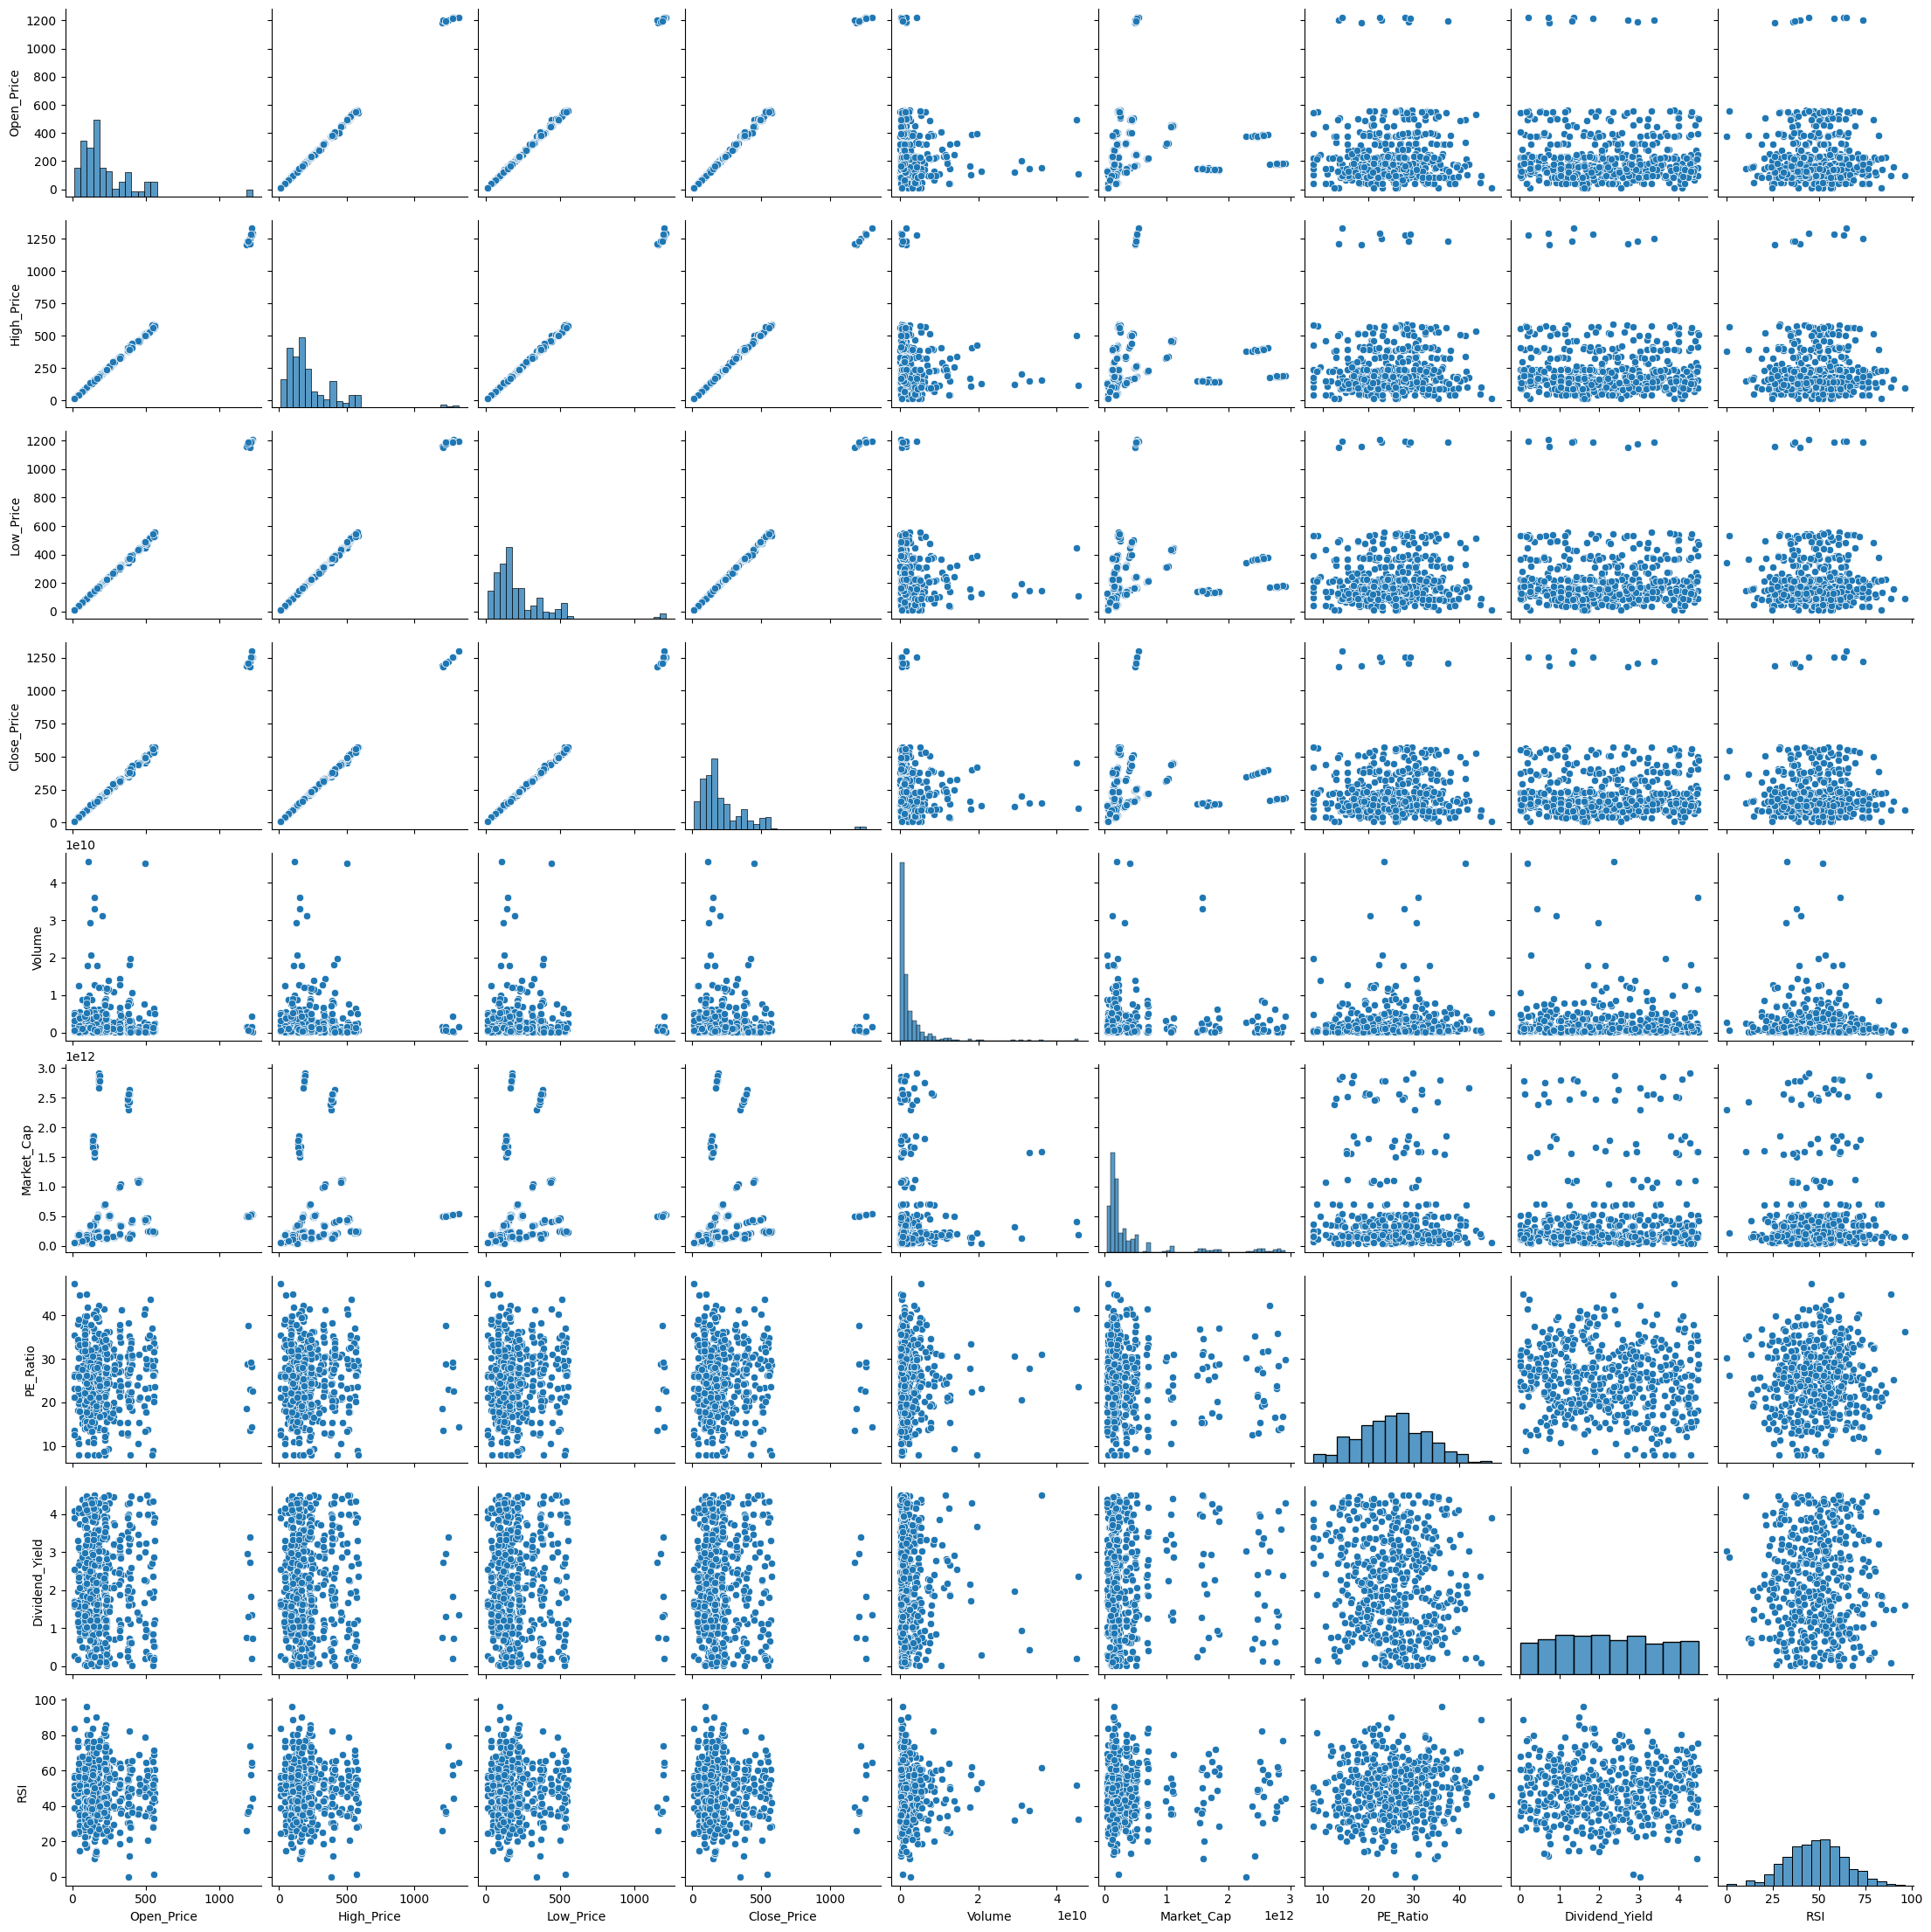

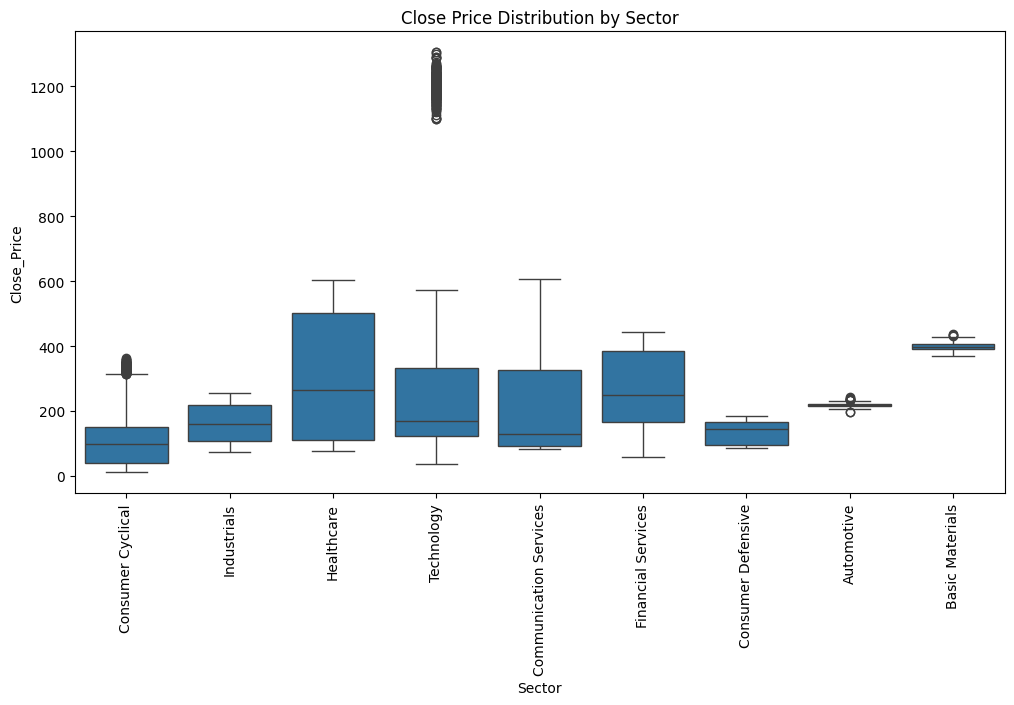

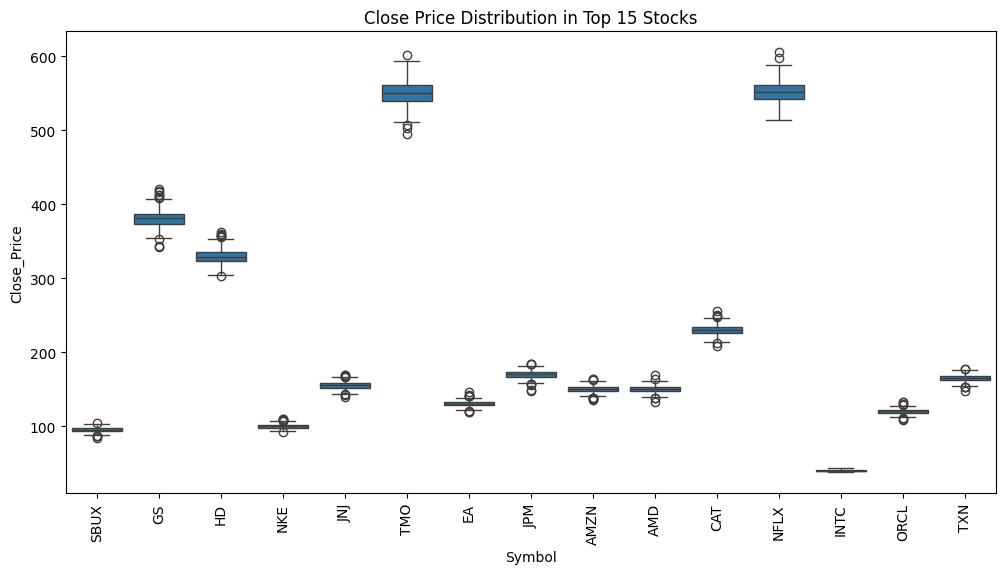

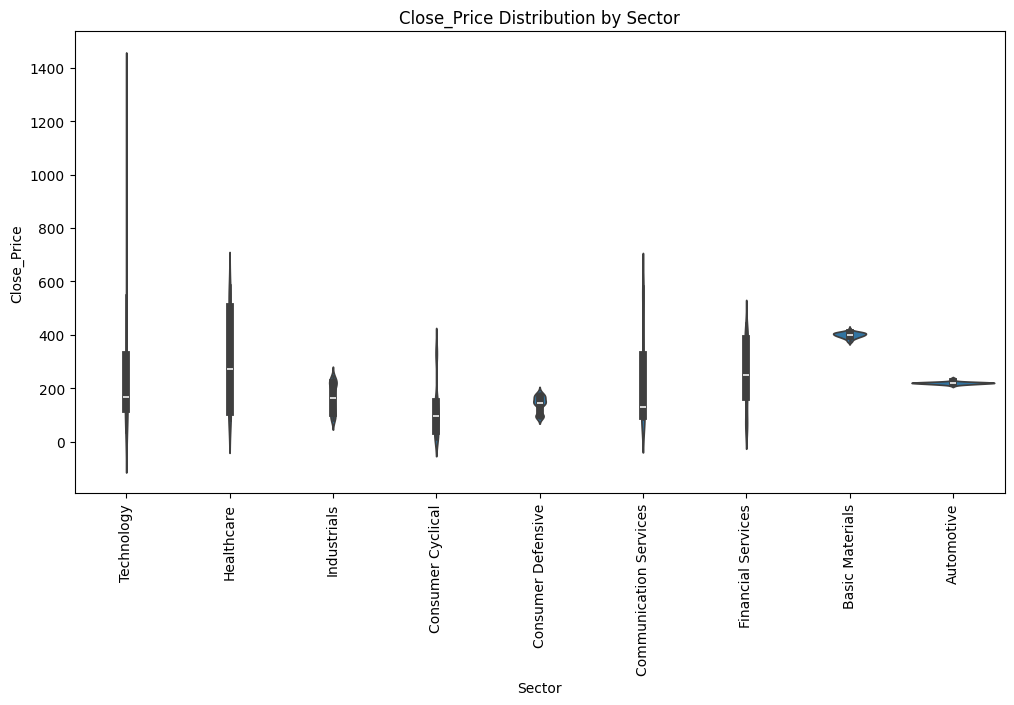

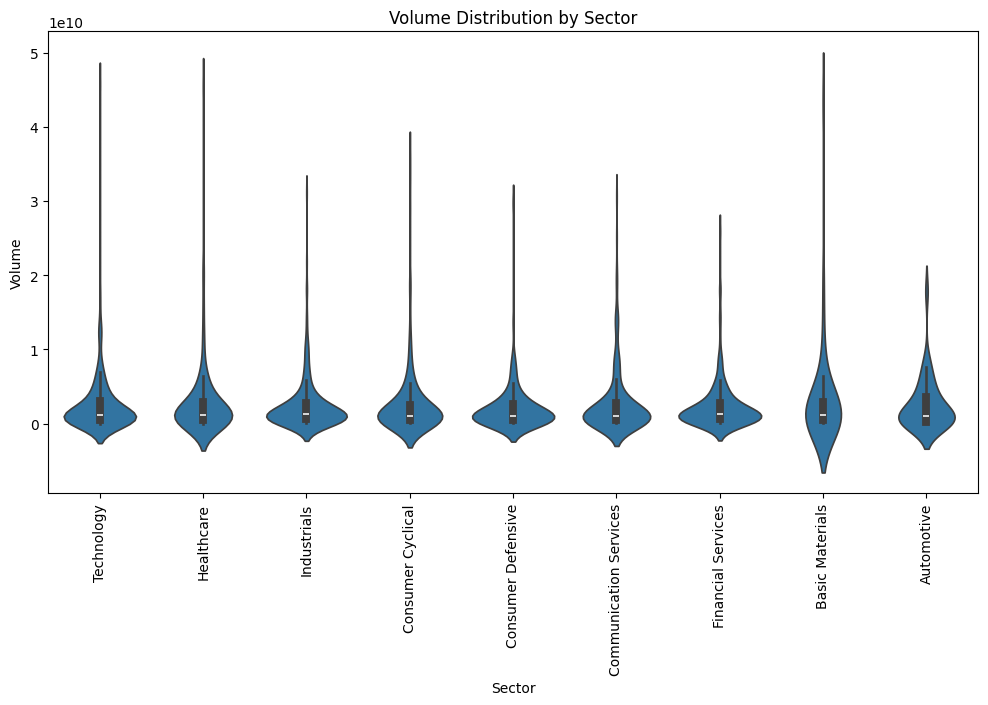

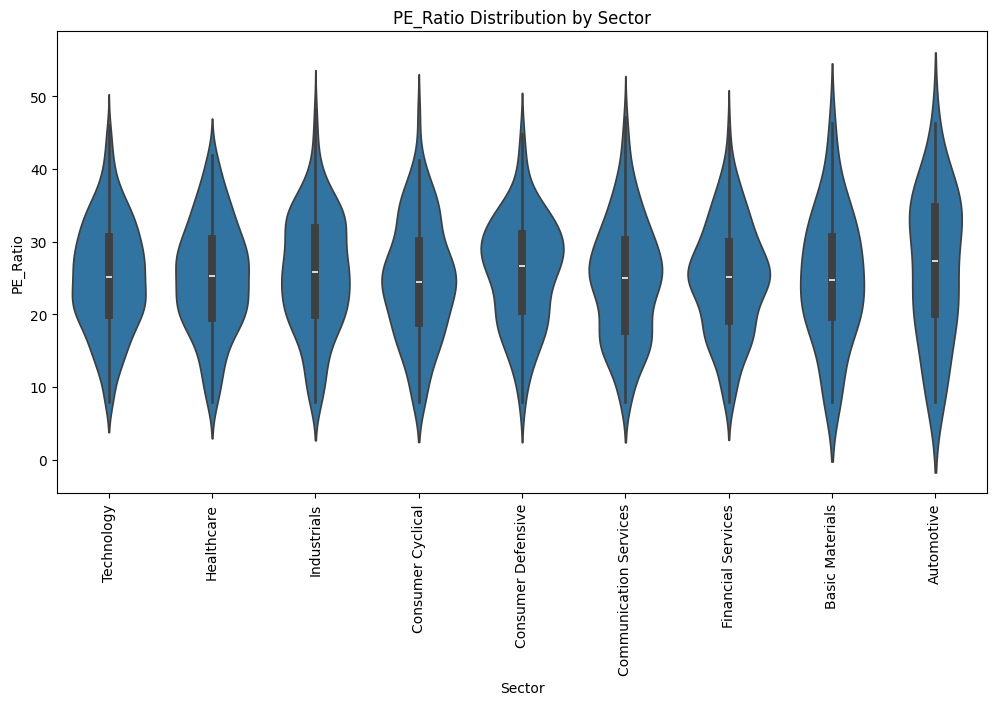

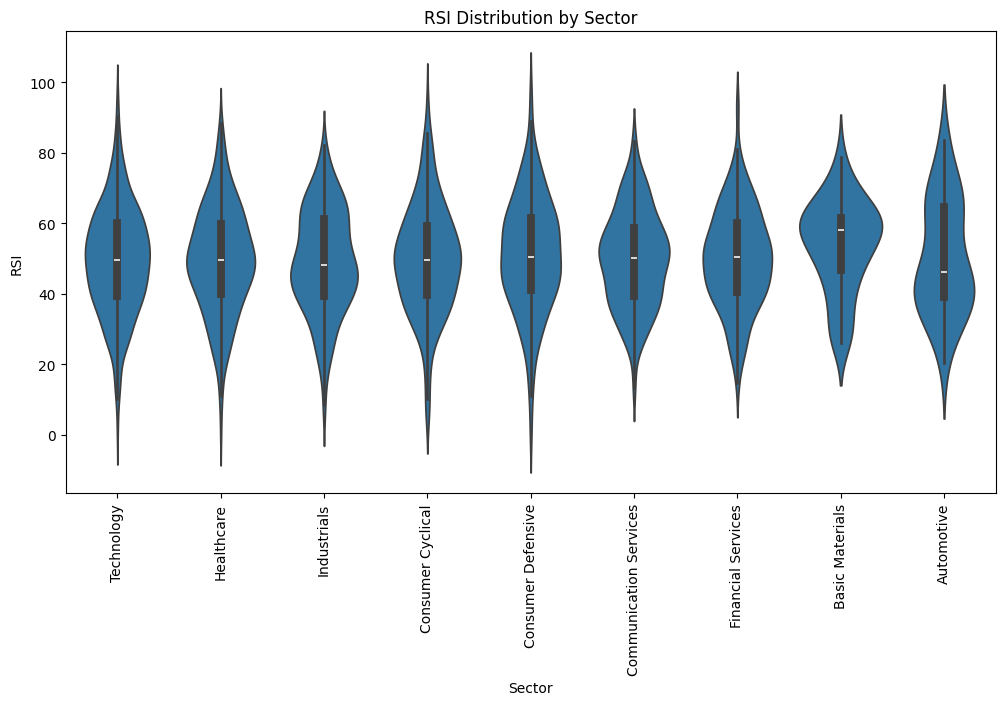

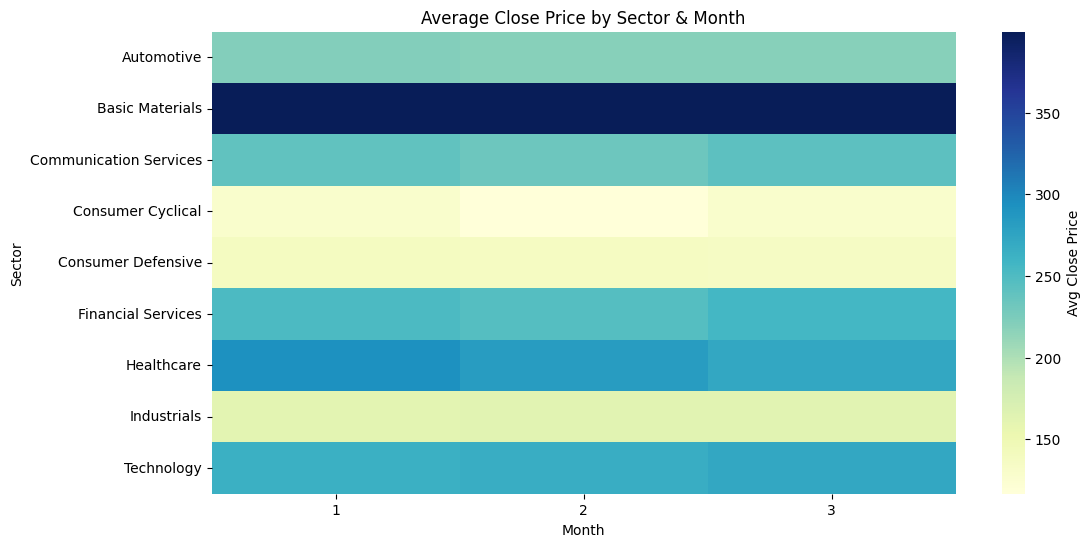

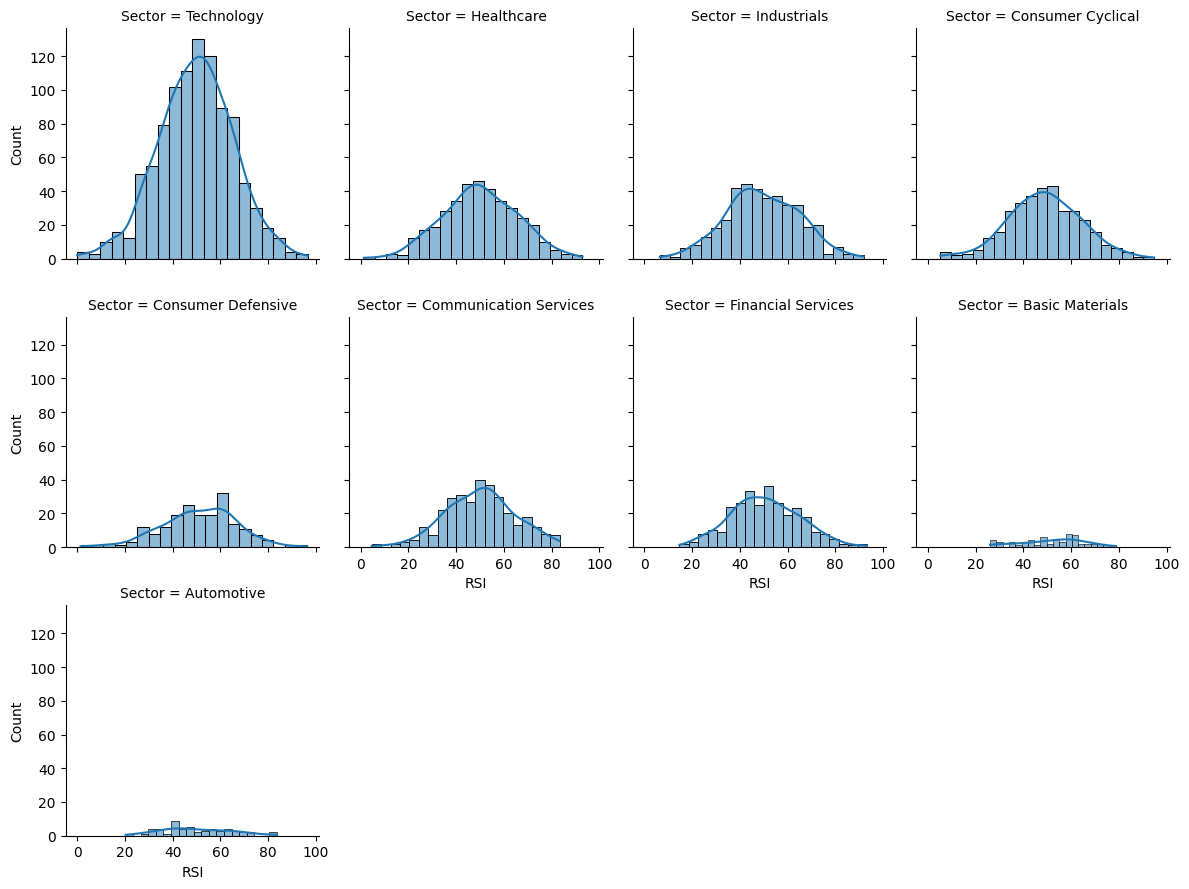

In [8]:
# ===============================
# Numeric Columns
# ===============================
numeric_cols = [
    "Open_Price", "High_Price", "Low_Price", "Close_Price",
    "Volume", "Market_Cap", "PE_Ratio", "Dividend_Yield", "RSI"
]

# ===============================
# 1. Univariate Analysis
# ===============================

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# ===============================
# 2. Bivariate Analysis
# ===============================

# Scatterplots (numeric vs Close_Price)
for col in [c for c in numeric_cols if c != "Close_Price"]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y="Close_Price", alpha=0.5)
    plt.title(f"{col} vs Close_Price")
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (sample for speed)
sns.pairplot(df[numeric_cols].sample(500, random_state=42))
plt.show()


# ===============================
# 3. Categorical Analysis
# ===============================

# Close Price distribution by Sector
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Sector", y="Close_Price")
plt.xticks(rotation=90)
plt.title("Close Price Distribution by Sector")
plt.show()

# Close Price distribution by Top 15 Symbols
top_symbols = df["Symbol"].value_counts().head(15).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["Symbol"].isin(top_symbols)], x="Symbol", y="Close_Price")
plt.xticks(rotation=90)
plt.title("Close Price Distribution in Top 15 Stocks")
plt.show()


# ===============================
# 4. Advanced Visualizations
# ===============================

# Violin plots for key metrics by Sector (sample for clarity)
for col in ["Close_Price", "Volume", "PE_Ratio", "RSI"]:
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df.sample(2000, random_state=42), x="Sector", y=col)
    plt.xticks(rotation=90)
    plt.title(f"{col} Distribution by Sector")
    plt.show()

# Heatmap: Average Close Price by Sector & Month
df["Month"] = pd.to_datetime(df["Date"]).dt.month
pivot = df.pivot_table(values="Close_Price", index="Sector", columns="Month", aggfunc="mean")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=False, cmap="YlGnBu", cbar_kws={"label": "Avg Close Price"})
plt.title("Average Close Price by Sector & Month")
plt.show()

# FacetGrid: RSI distribution by Sector
g = sns.FacetGrid(df.sample(3000, random_state=42), col="Sector", col_wrap=4, height=3)
g.map_dataframe(sns.histplot, x="RSI", bins=20, kde=True)
g.set_axis_labels("RSI", "Count")
plt.show()
